In [6]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
import xgboost as xgb
random_state=0

In [7]:
df= pd.read_csv('Concrete_Data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 
# Perform RFE with cross-validation
rfe_cv = RFECV(RandomForestRegressor(n_estimators=100, random_state=0), scoring='neg_mean_absolute_error', cv=10)
rfe_cv.fit(X, y)

# Get the optimal number of features
optimal_n = rfe_cv.n_features_
print('Optimal number of features:', optimal_n)

# Get the mask of selected features
selected_features_mask = rfe_cv.support_

# Print the selected feature names
selected_feature_names = np.array(X.columns)[selected_features_mask]
print("Selected features:", selected_feature_names)

# Create a new DataFrame with the selected features
X_selected = X.iloc[:, selected_features_mask]

X= X_selected
X

Optimal number of features: 5
Selected features: ['Cement' 'Blast Furnace Slag' 'Water' 'Superplasticizer' 'Age (day)']


,Cement,Blast Furnace Slag,Water,Superplasticizer,Age (day)
0,540.0,0.0,162.0,2.5,28
1,540.0,0.0,162.0,2.5,28
2,332.5,142.5,228.0,0.0,270
3,332.5,142.5,228.0,0.0,365
4,198.6,132.4,192.0,0.0,360
...,...,...,...,...,...
1025,276.4,116.0,179.6,8.9,28
1026,322.2,0.0,196.0,10.4,28
1027,148.5,139.4,192.7,6.1,28
1028,159.1,186.7,175.6,11.3,28


In [9]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength, Length: 1030, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Random Forest
start_time_rf = time.time()
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_rf = time.time() - start_time_rf
print("Runtime for Random Forest:", runtime_rf)
#print("Mean Absolute Error (Train):", np.mean(scores_dt) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_rf) * -1)
print()


# Decision Tree
start_time_dt = time.time()
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_dt = time.time() - start_time_dt
print("Runtime for Decision Tree:", runtime_dt)
#print("Results for Decision Tree:")
#print("Mean Absolute Error (Train):", np.mean(scores_dt) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_dt) * -1)
print()

# K-Nearest Neighbors
start_time_knn = time.time()
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_knn = time.time() - start_time_knn
print("Runtime for K-Nearest Neighbors:", runtime_knn)
#print("Mean Absolute Error (Train):", np.mean(scores_knn) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_knn) * -1)
print()


# XGBoost
start_time_xgb = time.time()
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_xgb = time.time() - start_time_xgb
print("Runtime for XGBoost:", runtime_xgb)
#print("Mean Absolute Error (Train):", np.mean(scores_xgb) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_xgb) * -1)
print()

Runtime for Random Forest: 3.506286859512329
Mean Absolute Error (Test): 5.008611989285715

Runtime for Decision Tree: 0.0680534839630127
Mean Absolute Error (Test): 6.944319047619048

Runtime for K-Nearest Neighbors: 0.029279708862304688
Mean Absolute Error (Test): 7.9698319047619055

Runtime for XGBoost: 1684.8531835079193
Mean Absolute Error (Test): 4.818142856130146



In [11]:
X1=X
X1

,Cement,Blast Furnace Slag,Water,Superplasticizer,Age (day)
0,540.0,0.0,162.0,2.5,28
1,540.0,0.0,162.0,2.5,28
2,332.5,142.5,228.0,0.0,270
3,332.5,142.5,228.0,0.0,365
4,198.6,132.4,192.0,0.0,360
...,...,...,...,...,...
1025,276.4,116.0,179.6,8.9,28
1026,322.2,0.0,196.0,10.4,28
1027,148.5,139.4,192.7,6.1,28
1028,159.1,186.7,175.6,11.3,28


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-12-0d7fe36b8789>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-12-0d7fe36b8789>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val

Runtime: 5307.8666343688965


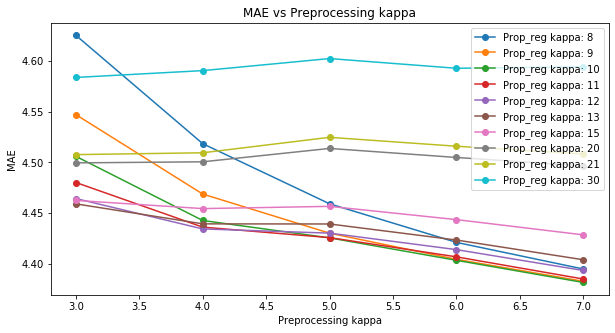

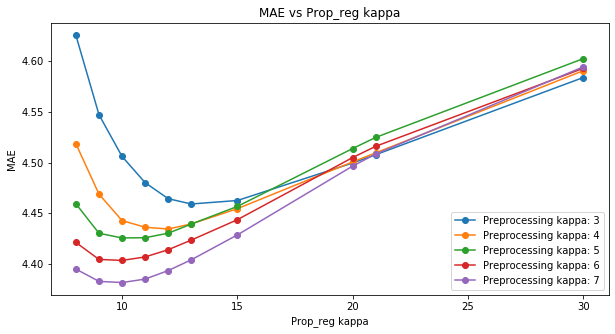

Optimal Preprocessing kappa: 7
Optimal Prop_reg kappa: 10
Minimum MAE: 4.381537034828923


In [12]:
start_time=time.time()
def normalize(X1):
    result = X1.copy()
    for feature_name in X1.columns:
        max_value = X1[feature_name].max()
        min_value = X1[feature_name].min()
        result[feature_name] = X1[feature_name] / (max_value - min_value)
    return result

X = normalize(X1)
X
def preprocess_data(X_train, X_test, y_train, kappa, ordinal_columns):
    X_train, X_test = handle_categorical(X_train, X_test, y_train, ordinal_columns)
    X_train, X_test = handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns)
    return X_train, X_test


def handle_categorical(X_train, X_test, y_train, ordinal_columns):
    means = {}

    for col in X_train.columns:
        if col not in ordinal_columns:  # Categorical variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_train:
                mean = y_train[X_train[col] == val].mean()
                means[(col, val)] = mean
                print(f"Column: {col}, Value: {val}, Mean: {mean}")

            for val in unique_values_test:
                if val not in unique_values_train:
                    print(f"Warning: Value {val} in column {col} of X_test is not in X_train.")

    for col, val in means:
        X_train.loc[X_train[col] == val, col] = means[(col, val)]
        X_test.loc[X_test[col] == val, col] = means[(col, val)]

    return X_train, X_test


def handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns):
    missing_values = {}

    for col in X_train.columns:
        if col in ordinal_columns:  # Ordinal variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_test:
                y_train_np = y_train.to_numpy()
                X_train_col_np = X_train[[col]].to_numpy()
                X_test_col_val = val
                l = 0
                v = 0
                for j in range(X_train_col_np.shape[0]):
                    d = abs(X_test_col_val - X_train_col_np[j])
                    l += y_train_np[j] / ((1 + d) ** kappa)
                    v += 1 / ((1 + d) ** kappa)
                imputed_value = l / v
                missing_values[(col, val)] = imputed_value

            for val in unique_values_train:
                if val not in unique_values_test:
                    y_train_np = y_train.to_numpy()
                    X_train_col_np = X_train[[col]].to_numpy()
                    X_train_col_val = val
                    l = 0
                    v = 0
                    for j in range(X_train_col_np.shape[0]):
                        d = abs(X_train_col_val - X_train_col_np[j])
                        l += y_train_np[j] / ((1 + d) ** kappa)
                        v += 1 / ((1 + d) ** kappa)
                    imputed_value = l / v
                    missing_values[(col, val)] = imputed_value

    for col, val in missing_values:
        X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
        X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

    return X_train, X_test



def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)

def kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    results = {}
    mae_values_per_kappa = {}

    for kappa_preprocessing in kappa_values_preprocessing:
        for kappa_prop_reg in kappa_values_prop_reg:
            mae_values = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, y_train, kappa_preprocessing, ordinal_columns)
                y_pred = prop_reg(X_test_preprocessed.values, X_train_preprocessed.values, y_train.values, y_test.values, kappa_prop_reg)
                mae = mean_absolute_error(y_test, y_pred)
                mae_values.append(mae)

            results[(kappa_preprocessing, kappa_prop_reg)] = np.mean(mae_values)
            mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)] = mae_values

    return results, mae_values_per_kappa


ordinal_columns = ['Cement' ,'Blast Furnace Slag', 'Water' ,'Superplasticizer' ,'Age (day)']

kappa_values_preprocessing = [3,4,5,6,7]
kappa_values_prop_reg = [8,9,10,11,12,13,15,20,21,30]

cv_results, mae_values_per_kappa = kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg)

runtime_pr = time.time() - start_time
print("Runtime:", runtime_pr)

# Plot the MAE vs kappa curve for preprocessing
plt.figure(figsize=(10, 5))
for kappa_prop_reg in kappa_values_prop_reg:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_preprocessing in kappa_values_preprocessing]
    plt.plot(kappa_values_preprocessing, mae_values, '-o', label=f"Prop_reg kappa: {kappa_prop_reg}")

plt.xlabel('Preprocessing kappa')
plt.ylabel('MAE')
plt.title('MAE vs Preprocessing kappa')
plt.legend()
plt.show()

# Plot the MAE vs kappa curve for prop_reg
plt.figure(figsize=(10, 5))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"Preprocessing kappa: {kappa_preprocessing}")

plt.xlabel('Prop_reg kappa')
plt.ylabel('MAE')
plt.title('MAE vs Prop_reg kappa')
plt.legend()
plt.show()


    # Find the optimal combination of kappa values
optimal_kappa_preprocessing, optimal_kappa_prop_reg = min(cv_results, key=cv_results.get)
optimal_mae = cv_results[(optimal_kappa_preprocessing, optimal_kappa_prop_reg)]

print(f"Optimal Preprocessing kappa: {optimal_kappa_preprocessing}")
print(f"Optimal Prop_reg kappa: {optimal_kappa_prop_reg}")
print(f"Minimum MAE: {optimal_mae}")


In [13]:
# Print all the combinations of kappa values and their corresponding MAE values
print("Kappa combinations and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_preprocessing, kappa_prop_reg, mae))

# Print all the combinations of kappa values and their corresponding MAE values
print("Prop_reg kappa and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_prop_reg, mae))

Kappa combinations and their MAE values:
(3, 8, 4.625482738571959)
(3, 9, 4.547199634777069)
(3, 10, 4.506018014371518)
(3, 11, 4.480188734850867)
(3, 12, 4.464345099079005)
(3, 13, 4.4590936458351935)
(3, 15, 4.462523104867652)
(3, 20, 4.499583827088729)
(3, 21, 4.507744594768121)
(3, 30, 4.583928937161293)
(4, 8, 4.518528737562389)
(4, 9, 4.468787714228711)
(4, 10, 4.442696857763497)
(4, 11, 4.436140092294524)
(4, 12, 4.434361782936724)
(4, 13, 4.43937243721607)
(4, 15, 4.454448780735875)
(4, 20, 4.500637043865405)
(4, 21, 4.509551688863732)
(4, 30, 4.590666518002653)
(5, 8, 4.459179733431341)
(5, 9, 4.430179212861001)
(5, 10, 4.4255506822754045)
(5, 11, 4.425804211299219)
(5, 12, 4.43023485349376)
(5, 13, 4.439258884986157)
(5, 15, 4.456656422325635)
(5, 20, 4.513836912721247)
(5, 21, 4.5248137958217125)
(5, 30, 4.6025701213865045)
(6, 8, 4.421103702762607)
(6, 9, 4.404359280398976)
(6, 10, 4.403389920807549)
(6, 11, 4.406815853269407)
(6, 12, 4.4139393616026785)
(6, 13, 4.423419592

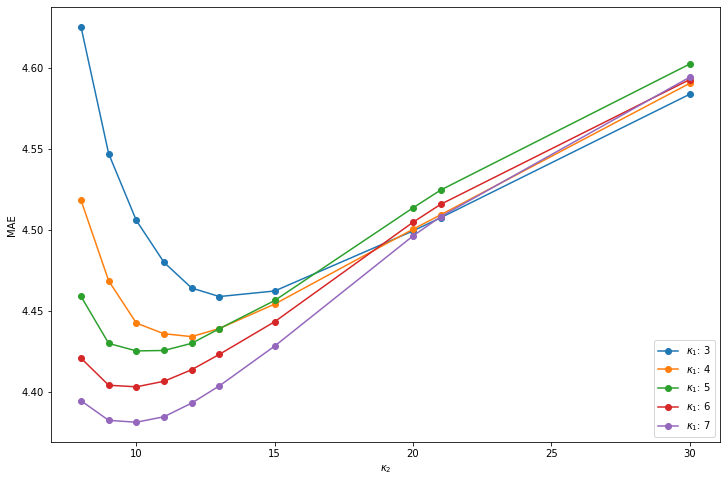

In [14]:
plt.figure(figsize=(12, 8))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"$\\kappa_1$: {kappa_preprocessing}")

plt.xlabel('$\\kappa_2$')
plt.ylabel('MAE')
plt.legend()

# Save the plot as a PDF
plt.savefig('concretefeature_mae_vs_predicting_kappa.pdf', format='pdf')

# Show the plot
plt.show()

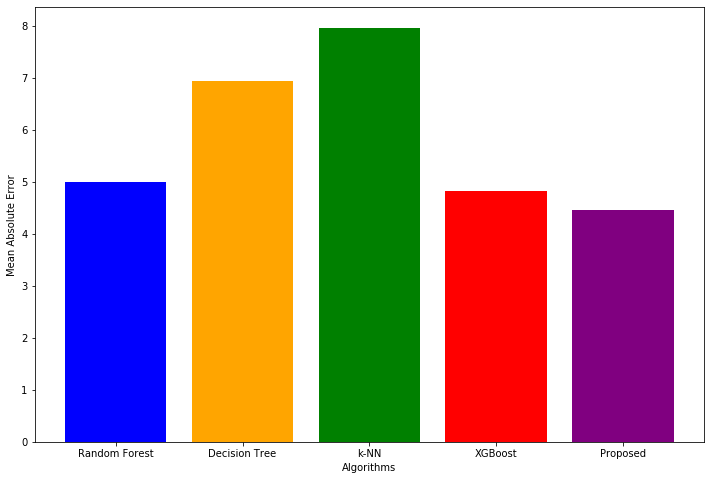

In [15]:
# Results data
results = {
    'Random Forest':5.009 ,
    'Decision Tree': 6.944,
    'k-NN': 7.97,
    'XGBoost': 4.818,
    'Proposed': 4.459,
}

# Plot the bar graph
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(results.keys(), results.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
ax.set_xlabel('Algorithms')
ax.set_ylabel('Mean Absolute Error')

# Save the plot as a PDF
plt.savefig('concretefeatureresults_bar_graph.pdf', format='pdf')

# Show the plot
plt.show()
